# Trabalho Prático de Grupo - Previsão de incidentes rodoviários

## Basic Imports

In [1]:
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score,fbeta_score
import numpy as np
import time

## Dataset Read & Description

1. city_name: nome da cidade (unique value -> Guimaraes)​

2. magnitude_of_delay: magnitude do atraso provocado pelos incidentes (MAJOR, UNDEFINED OU MODERATE)​

3. delay_in_seconds: atraso, em segundos, provocado pelos incidentes (entre 0 e 31083)​

4. affected_roads: estradas afectadas pelos incidentes​

5. record_date: o timestamp associado ao registo (entre 16JAN21 e 31DEC21)​

6. Luminosity: o nível de luminosidade (DARK, LIGHT,LOW_LIGHT)​

7. avg_temperature: valor médio da temperatura (varia entre 1.0 e 35.0)​

8. avg_atm_pressure: valor médio da pressão atmosférica (varia entre 997.0 e 1032.0)​

9. avg_humidity: valor médio de humidade (varia entre 6.0 e 100.0)​

10. avg_wind_speed: valor médio da velocidade do vento (varia entre 0.0 e 10.0)​

11. avg_precipitation: valor médio de precipitação (unique value -> 0.0)​

12. avg_rain: avaliação qualitativa do nível de precipitação (Sem chuva, chuva fraca, moderada ou forte)

In [2]:
dtrain = pd.read_csv('Datasets/training_data.csv')
dtest = pd.read_csv('Datasets/test_data.csv')

In [3]:
dtrain

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-04-13 00:00,DARK,13.0,1021.0,56.0,0.0,0.0,Sem Chuva,High
4996,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-06 14:00,LIGHT,19.0,1017.0,68.0,0.0,0.0,Sem Chuva,None
4997,Guimaraes,UNDEFINED,0,",",2021-03-18 03:00,DARK,13.0,1023.0,47.0,2.0,0.0,Sem Chuva,None
4998,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-11-02 06:00,DARK,12.0,1014.0,93.0,2.0,0.0,Sem Chuva,None


In [4]:
dtest

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain
0,Guimaraes,UNDEFINED,1211,"N101,N101,N101,N101,N101,N101,",2021-04-13 19:00,LIGHT,15.0,1018.0,80.0,0.0,0.0,Sem Chuva
1,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-10-13 04:00,DARK,16.0,1018.0,41.0,2.0,0.0,Sem Chuva
2,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-18 19:00,LIGHT,22.0,1017.0,71.0,0.0,0.0,Sem Chuva
3,Guimaraes,UNDEFINED,140,"N101,R206,N101,N101,N101,N101",2021-10-30 15:00,LIGHT,18.0,1008.0,81.0,3.0,0.0,Sem Chuva
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-10-18 10:00,LIGHT,20.0,1022.0,86.0,0.0,0.0,Sem Chuva
...,...,...,...,...,...,...,...,...,...,...,...,...
1201,Guimaraes,UNDEFINED,0,N101,2021-12-31 10:00,LIGHT,12.0,1025.0,70.0,2.0,0.0,Sem Chuva
1202,Guimaraes,UNDEFINED,44,"N101,N101,N101,N101,N101",2021-07-16 00:00,DARK,24.0,1016.0,39.0,2.0,0.0,Sem Chuva
1203,Guimaraes,MAJOR,1261,"N101,N101,N101,N101,N101,N101,N101",2021-12-19 15:00,LIGHT,13.0,1018.0,60.0,0.0,0.0,Sem Chuva
1204,Guimaraes,UNDEFINED,246,NaN,2021-03-08 17:00,LIGHT,15.0,1015.0,50.0,1.0,0.0,Sem Chuva


## Dataset Exploration & Treatment


### Visualization

In [5]:
dtrain.columns

Index(['city_name', 'magnitude_of_delay', 'delay_in_seconds', 'affected_roads',
       'record_date', 'luminosity', 'avg_temperature', 'avg_atm_pressure',
       'avg_humidity', 'avg_wind_speed', 'avg_precipitation', 'avg_rain',
       'incidents'],
      dtype='object')

In [6]:
dtest.columns

Index(['city_name', 'magnitude_of_delay', 'delay_in_seconds', 'affected_roads',
       'record_date', 'luminosity', 'avg_temperature', 'avg_atm_pressure',
       'avg_humidity', 'avg_wind_speed', 'avg_precipitation', 'avg_rain'],
      dtype='object')

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [7]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


In [8]:
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           1206 non-null   object 
 1   magnitude_of_delay  1206 non-null   object 
 2   delay_in_seconds    1206 non-null   int64  
 3   affected_roads      1184 non-null   object 
 4   record_date         1206 non-null   object 
 5   luminosity          1206 non-null   object 
 6   avg_temperature     1206 non-null   float64
 7   avg_atm_pressure    1206 non-null   float64
 8   avg_humidity        1206 non-null   float64
 9   avg_wind_speed      1206 non-null   float64
 10  avg_precipitation   1206 non-null   float64
 11  avg_rain            1206 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 113.2+ KB


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [9]:
dtrain.shape

(5000, 13)

In [10]:
dtest.shape

(1206, 12)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

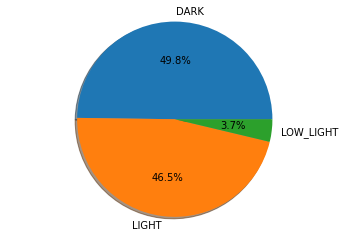

In [11]:
labels = dtrain['luminosity'].astype('category').cat.categories.tolist()
counts = dtrain['luminosity'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True)
ax1.set_aspect(aspect='auto')
fig1.set_facecolor(color='white')
ax1.axis('equal')
plt.show()

Olhando para este gráfico, rapidamente percebemos que a 'luminosity' está diretamente relacionada com o horário do dia em que nos encontramos, sendo:
- DARK - horário noturno/noite
- LIGHT - horário diurno/dia
- LOW_LIGHT - entardecer/amanhecer

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

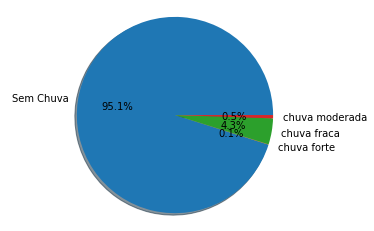

In [12]:
labels = dtrain['avg_rain'].astype('category').cat.categories.tolist()
counts = dtrain['avg_rain'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True)
ax1.set_aspect(aspect='auto')
fig1.set_facecolor(color='white')
ax1.axis('equal')
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

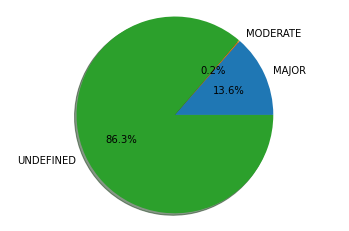

In [13]:
labels = dtrain['magnitude_of_delay'].astype('category').cat.categories.tolist()
counts = dtrain['magnitude_of_delay'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True)
ax1.set_aspect(aspect='auto')
fig1.set_facecolor(color='white')
ax1.axis('equal')
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Medidas de dispersão

In [14]:
dtrain.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,560.567000,14.583000,1018.145000,74.455000,1.253500,0.0
std,1686.859581,4.820514,5.174372,17.204638,1.269847,0.0
min,0.000000,1.000000,997.000000,6.000000,0.000000,0.0
25%,0.000000,11.000000,1015.000000,63.000000,0.000000,0.0
50%,0.000000,14.000000,1019.000000,78.000000,1.000000,0.0
75%,234.000000,18.000000,1022.000000,90.000000,2.000000,0.0
max,31083.000000,35.000000,1032.000000,100.000000,10.000000,0.0


In [15]:
dtest.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation
count,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.0
mean,565.080431,14.649254,1018.024876,73.865672,1.332504,0.0
std,1584.544376,4.691180,5.338753,17.202341,1.337510,0.0
min,0.000000,2.000000,999.000000,7.000000,0.000000,0.0
25%,0.000000,11.000000,1015.000000,62.000000,0.000000,0.0
50%,0.000000,14.000000,1018.000000,77.000000,1.000000,0.0
75%,268.750000,18.000000,1022.000000,90.000000,2.000000,0.0
max,14866.000000,30.000000,1031.000000,100.000000,9.000000,0.0


----------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Missing Values

In [16]:
print(dtrain.isna().sum())

city_name              0
magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_precipitation      0
avg_rain               0
incidents              0
dtype: int64


In [17]:
print(dtest.isna().sum())

city_name              0
magnitude_of_delay     0
delay_in_seconds       0
affected_roads        22
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_precipitation      0
avg_rain               0
dtype: int64


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Unique Values

In [18]:
dtrain.nunique()

city_name                1
magnitude_of_delay       3
delay_in_seconds      1186
affected_roads         678
record_date           5000
luminosity               3
avg_temperature         35
avg_atm_pressure        36
avg_humidity            83
avg_wind_speed          11
avg_precipitation        1
avg_rain                 4
incidents                5
dtype: int64

In [19]:
dtest.nunique()

city_name                1
magnitude_of_delay       3
delay_in_seconds       400
affected_roads         205
record_date           1206
luminosity               3
avg_temperature         29
avg_atm_pressure        31
avg_humidity            77
avg_wind_speed           9
avg_precipitation        1
avg_rain                 4
dtype: int64

In [20]:
dtrain['avg_precipitation'].value_counts()

0.0    5000
Name: avg_precipitation, dtype: int64

Ao olhar para os valores que estão presentes na coluna 'avg_precipitation', percebemos que só temos o valor 0.0 em todas as linhas desta coluna, por isso, é feito o drop desta coluna por não ser relevante para os modelos de ML que queremos desenvolver.

In [21]:
dtrain = dtrain.drop(['avg_precipitation'],axis=1)
dtest = dtest.drop(['avg_precipitation'], axis=1)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [22]:
dtrain['city_name'].value_counts()

Guimaraes    5000
Name: city_name, dtype: int64

Ao olhar para os valores que estão presentes na coluna 'city_name', percebemos que só temos registo de uma cidade que é 'Guimarães' em todas as linhas desta coluna, por isso, é feito o drop desta coluna por não ser relevante para os modelos de ML que queremos desenvolver.

In [23]:
dtrain = dtrain.drop(['city_name'],axis=1)
dtest = dtest.drop(['city_name'],axis=1)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

###  Duplicates

In [24]:
dtrain.duplicated().sum()
# NO duplicates needed to be taken care of.

0

In [25]:
dtest.duplicated().sum()

0

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Dates

- De forma a obter melhores previsões, necessário tratar das datas:
    1. Adicionar a hora do dia e talvez depois um bining para as diferentes horas da manha 
    2. Adicionar os dias da semana de cada ocorrencia para que ajude o modelo a perceber em que dias da semana ha um maior numeor de ocorrencias 

In [26]:
dtrain['record_date'] = pd.to_datetime(dtrain['record_date'])
dtest['record_date'] = pd.to_datetime(dtest['record_date'])

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Extracting day of the week from 'record_date'

- 0 -> Monday 
- 1 -> Tuesday
- 2 -> Wednesday
- 3 -> Thursday
- 4 -> Friday
- 5 -> Saturday
- 6 -> Sunday

In [27]:
dtrain['day_of_the_week'] = dtrain['record_date'].dt.dayofweek
dtest['day_of_the_week'] = dtest['record_date'].dt.dayofweek

In [28]:
dtrain

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,day_of_the_week
0,UNDEFINED,0,",",2021-03-15 23:00:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None,0
1,UNDEFINED,385,"N101,",2021-12-25 18:00:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None,5
2,UNDEFINED,69,",",2021-03-12 15:00:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low,4
3,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High,2
4,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-04-13 00:00:00,DARK,13.0,1021.0,56.0,0.0,Sem Chuva,High,1
4996,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-06 14:00:00,LIGHT,19.0,1017.0,68.0,0.0,Sem Chuva,None,1
4997,UNDEFINED,0,",",2021-03-18 03:00:00,DARK,13.0,1023.0,47.0,2.0,Sem Chuva,None,3
4998,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-11-02 06:00:00,DARK,12.0,1014.0,93.0,2.0,Sem Chuva,None,1


In [29]:
dtest

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,day_of_the_week
0,UNDEFINED,1211,"N101,N101,N101,N101,N101,N101,",2021-04-13 19:00:00,LIGHT,15.0,1018.0,80.0,0.0,Sem Chuva,1
1,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-10-13 04:00:00,DARK,16.0,1018.0,41.0,2.0,Sem Chuva,2
2,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-18 19:00:00,LIGHT,22.0,1017.0,71.0,0.0,Sem Chuva,6
3,UNDEFINED,140,"N101,R206,N101,N101,N101,N101",2021-10-30 15:00:00,LIGHT,18.0,1008.0,81.0,3.0,Sem Chuva,5
4,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-10-18 10:00:00,LIGHT,20.0,1022.0,86.0,0.0,Sem Chuva,0
...,...,...,...,...,...,...,...,...,...,...,...
1201,UNDEFINED,0,N101,2021-12-31 10:00:00,LIGHT,12.0,1025.0,70.0,2.0,Sem Chuva,4
1202,UNDEFINED,44,"N101,N101,N101,N101,N101",2021-07-16 00:00:00,DARK,24.0,1016.0,39.0,2.0,Sem Chuva,4
1203,MAJOR,1261,"N101,N101,N101,N101,N101,N101,N101",2021-12-19 15:00:00,LIGHT,13.0,1018.0,60.0,0.0,Sem Chuva,6
1204,UNDEFINED,246,NaN,2021-03-08 17:00:00,LIGHT,15.0,1015.0,50.0,1.0,Sem Chuva,0


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


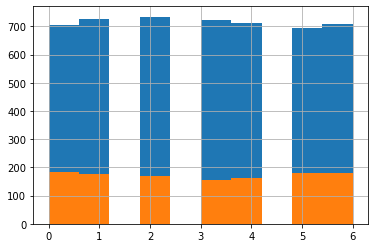

In [30]:
print(dtrain['day_of_the_week'].hist())
print(dtest['day_of_the_week'].hist())


Ao olhar para a frequencia de incidentes que acontecem em cada um dos dias da semana, podemos observar que num panorama geral nao há uma variação siginificativa, ou por outras palavras, nao há nenhuma distinção siginificativa entre os dias da semana, logo a adição desta informação não vai ajudar o modelo a fazer uma boa previsão.

In [31]:
print(dtrain['record_date'].between('2021-01-01','2021/12/31').count())

5000


In [32]:
dtrain['isWeekend'] = 1
dtest['isWeekend'] = 1
dtrain.loc[dtrain['day_of_the_week'] < 5, 'isWeekend'] = 0
dtest.loc[dtest['day_of_the_week'] < 5, 'isWeekend'] = 0
dtrain

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,day_of_the_week,isWeekend
0,UNDEFINED,0,",",2021-03-15 23:00:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None,0,0
1,UNDEFINED,385,"N101,",2021-12-25 18:00:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None,5,1
2,UNDEFINED,69,",",2021-03-12 15:00:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low,4,0
3,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High,2,0
4,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-04-13 00:00:00,DARK,13.0,1021.0,56.0,0.0,Sem Chuva,High,1,0
4996,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-06 14:00:00,LIGHT,19.0,1017.0,68.0,0.0,Sem Chuva,None,1,0
4997,UNDEFINED,0,",",2021-03-18 03:00:00,DARK,13.0,1023.0,47.0,2.0,Sem Chuva,None,3,0
4998,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-11-02 06:00:00,DARK,12.0,1014.0,93.0,2.0,Sem Chuva,None,1,0


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


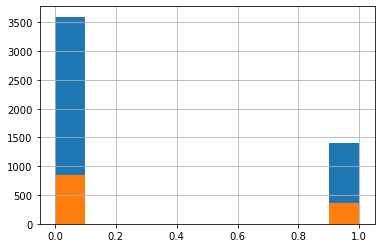

In [33]:
print(dtrain['isWeekend'].hist())
print(dtest['isWeekend'].hist())


Olhando para a diferença que existe entre o numero de ocorrencias no fim de semana e durante a semana, apesar da diferença relativamente grande, nao será um fator determinante na decisão que o modelo tem de tomar tambem logo descartamos tambem a adição deste feature

In [34]:
dtrain = dtrain.drop(['day_of_the_week'],axis=1)
dtest = dtest.drop(['day_of_the_week'],axis=1)


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Extracting hour of the day to a new collumn

In [35]:
dtest['hour_of_the_day'] = dtest['record_date'].dt.hour
dtrain['hour_of_the_day'] = dtrain['record_date'].dt.hour


In [36]:
dtrain

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,isWeekend,hour_of_the_day
0,UNDEFINED,0,",",2021-03-15 23:00:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None,0,23
1,UNDEFINED,385,"N101,",2021-12-25 18:00:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None,1,18
2,UNDEFINED,69,",",2021-03-12 15:00:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low,0,15
3,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High,0,9
4,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-04-13 00:00:00,DARK,13.0,1021.0,56.0,0.0,Sem Chuva,High,0,0
4996,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-06 14:00:00,LIGHT,19.0,1017.0,68.0,0.0,Sem Chuva,None,0,14
4997,UNDEFINED,0,",",2021-03-18 03:00:00,DARK,13.0,1023.0,47.0,2.0,Sem Chuva,None,0,3
4998,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-11-02 06:00:00,DARK,12.0,1014.0,93.0,2.0,Sem Chuva,None,0,6


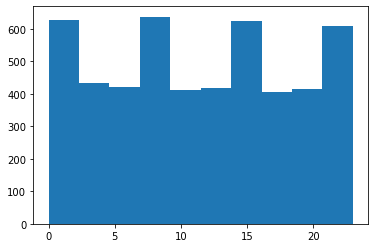

In [37]:

n , bins, qlq = plt.hist(dtrain['hour_of_the_day'])

- Certas horas do dia, como seria de prever, regista-se um maior numero de ocorrencias
- Este aumento do numero de ocorrencias esta claramente relacionado com as horas de maior movimento na ciadade de guimaraes, as chamadas Horas de ponta: [7,10[,  ]12,16]
- Vemos tambem que as horas com o maior numero de ocorrencias é entre as ]21,02], relacionado com varios fatores como a velocidade de circulação a essas horas, a velocidade, etc...

Tendo isto em conta, criar um novo atributo que irá ser um binning desta coluna das horas do dia de forma a acrescentar o conceito de 'hora de ponta'

In [38]:
bins = [0, 2.3, 4.6, 6.9, 9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23]
labels = [1, 0, 0 ,1, 0, 0, 1, 0, 0, 1]
dtrain['rush_hour'] = pd.cut(dtrain['hour_of_the_day'], bins=bins,labels=labels,ordered=False, include_lowest=True)
dtrain

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,isWeekend,hour_of_the_day,rush_hour
0,UNDEFINED,0,",",2021-03-15 23:00:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None,0,23,1
1,UNDEFINED,385,"N101,",2021-12-25 18:00:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None,1,18,0
2,UNDEFINED,69,",",2021-03-12 15:00:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low,0,15,1
3,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High,0,9,1
4,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High,1,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-04-13 00:00:00,DARK,13.0,1021.0,56.0,0.0,Sem Chuva,High,0,0,1
4996,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-06 14:00:00,LIGHT,19.0,1017.0,68.0,0.0,Sem Chuva,None,0,14,1
4997,UNDEFINED,0,",",2021-03-18 03:00:00,DARK,13.0,1023.0,47.0,2.0,Sem Chuva,None,0,3,0
4998,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-11-02 06:00:00,DARK,12.0,1014.0,93.0,2.0,Sem Chuva,None,0,6,0


1. Same treatment done to the test dataset

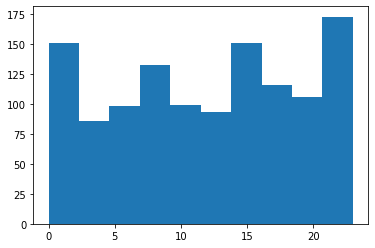

In [39]:
n , bins, qlq = plt.hist(dtest['hour_of_the_day'])

In [40]:
bins = [0, 2.3, 4.6, 6.9, 9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23]
labels = [1, 0, 0 ,1, 0, 0, 1, 0, 0, 1]
dtest['rush_hour'] = pd.cut(dtest['hour_of_the_day'], bins=bins,labels=labels,ordered=False, include_lowest=True)
dtest

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,isWeekend,hour_of_the_day,rush_hour
0,UNDEFINED,1211,"N101,N101,N101,N101,N101,N101,",2021-04-13 19:00:00,LIGHT,15.0,1018.0,80.0,0.0,Sem Chuva,0,19,0
1,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-10-13 04:00:00,DARK,16.0,1018.0,41.0,2.0,Sem Chuva,0,4,0
2,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-18 19:00:00,LIGHT,22.0,1017.0,71.0,0.0,Sem Chuva,1,19,0
3,UNDEFINED,140,"N101,R206,N101,N101,N101,N101",2021-10-30 15:00:00,LIGHT,18.0,1008.0,81.0,3.0,Sem Chuva,1,15,1
4,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-10-18 10:00:00,LIGHT,20.0,1022.0,86.0,0.0,Sem Chuva,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,UNDEFINED,0,N101,2021-12-31 10:00:00,LIGHT,12.0,1025.0,70.0,2.0,Sem Chuva,0,10,0
1202,UNDEFINED,44,"N101,N101,N101,N101,N101",2021-07-16 00:00:00,DARK,24.0,1016.0,39.0,2.0,Sem Chuva,0,0,1
1203,MAJOR,1261,"N101,N101,N101,N101,N101,N101,N101",2021-12-19 15:00:00,LIGHT,13.0,1018.0,60.0,0.0,Sem Chuva,1,15,1
1204,UNDEFINED,246,NaN,2021-03-08 17:00:00,LIGHT,15.0,1015.0,50.0,1.0,Sem Chuva,0,17,0


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Creating information about the 4 different seasons in the year


In [41]:
## TRAINING DATASET

dtrain['month'] = dtrain['record_date'].dt.month

seasons = {
    1 : "Winter",
    2 : "Winter",
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}

dtrain['season'] = dtrain['month'].map(seasons)

one_hot_seasons = pd.get_dummies(dtrain['season'],prefix='season')
dtrain = pd.concat([dtrain, one_hot_seasons], axis = 1)

dtrain

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,isWeekend,hour_of_the_day,rush_hour,month,season,season_Autumn,season_Spring,season_Summer,season_Winter
0,UNDEFINED,0,",",2021-03-15 23:00:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None,0,23,1,3,Spring,0,1,0,0
1,UNDEFINED,385,"N101,",2021-12-25 18:00:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None,1,18,0,12,Winter,0,0,0,1
2,UNDEFINED,69,",",2021-03-12 15:00:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low,0,15,1,3,Spring,0,1,0,0
3,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High,0,9,1,9,Autumn,1,0,0,0
4,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High,1,11,0,6,Summer,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-04-13 00:00:00,DARK,13.0,1021.0,56.0,0.0,Sem Chuva,High,0,0,1,4,Spring,0,1,0,0
4996,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-06 14:00:00,LIGHT,19.0,1017.0,68.0,0.0,Sem Chuva,None,0,14,1,7,Summer,0,0,1,0
4997,UNDEFINED,0,",",2021-03-18 03:00:00,DARK,13.0,1023.0,47.0,2.0,Sem Chuva,None,0,3,0,3,Spring,0,1,0,0
4998,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-11-02 06:00:00,DARK,12.0,1014.0,93.0,2.0,Sem Chuva,None,0,6,0,11,Autumn,1,0,0,0


In [42]:
## Test DATASET

dtest['month'] = dtest['record_date'].dt.month
dtest['season'] = dtest['month'].map(seasons)

one_hot_seasons = pd.get_dummies(dtest['season'],prefix='season')
dtest = pd.concat([dtest, one_hot_seasons], axis = 1)
dtest = dtest.drop(['season'], axis = 1)

dtest

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,isWeekend,hour_of_the_day,rush_hour,month,season_Autumn,season_Spring,season_Summer,season_Winter
0,UNDEFINED,1211,"N101,N101,N101,N101,N101,N101,",2021-04-13 19:00:00,LIGHT,15.0,1018.0,80.0,0.0,Sem Chuva,0,19,0,4,0,1,0,0
1,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-10-13 04:00:00,DARK,16.0,1018.0,41.0,2.0,Sem Chuva,0,4,0,10,1,0,0,0
2,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-18 19:00:00,LIGHT,22.0,1017.0,71.0,0.0,Sem Chuva,1,19,0,7,0,0,1,0
3,UNDEFINED,140,"N101,R206,N101,N101,N101,N101",2021-10-30 15:00:00,LIGHT,18.0,1008.0,81.0,3.0,Sem Chuva,1,15,1,10,1,0,0,0
4,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-10-18 10:00:00,LIGHT,20.0,1022.0,86.0,0.0,Sem Chuva,0,10,0,10,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,UNDEFINED,0,N101,2021-12-31 10:00:00,LIGHT,12.0,1025.0,70.0,2.0,Sem Chuva,0,10,0,12,0,0,0,1
1202,UNDEFINED,44,"N101,N101,N101,N101,N101",2021-07-16 00:00:00,DARK,24.0,1016.0,39.0,2.0,Sem Chuva,0,0,1,7,0,0,1,0
1203,MAJOR,1261,"N101,N101,N101,N101,N101,N101,N101",2021-12-19 15:00:00,LIGHT,13.0,1018.0,60.0,0.0,Sem Chuva,1,15,1,12,0,0,0,1
1204,UNDEFINED,246,NaN,2021-03-08 17:00:00,LIGHT,15.0,1015.0,50.0,1.0,Sem Chuva,0,17,0,3,0,1,0,0


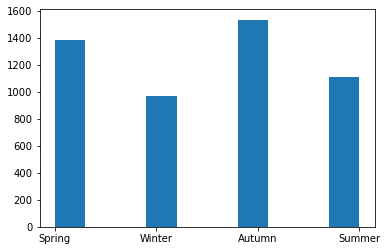

In [43]:
n , bins, qlq = plt.hist(dtrain['season'])

Como podemos observar, pode ajudar ao modelo a adição da informação sobre a estação do ano pois efetivamente a quantidade de incidentes que acontecem nas diferentes estaçoes são diferentes.

In [44]:
dtrain = dtrain.drop(['season'], axis = 1)

--------------------------------------------------------------------------------------------------------------------------------------------

In [45]:
dtest['day_of_the_month'] = dtest['record_date'].dt.day
dtrain['day_of_the_month'] = dtrain['record_date'].dt.day
dtrain

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,isWeekend,hour_of_the_day,rush_hour,month,season_Autumn,season_Spring,season_Summer,season_Winter,day_of_the_month
0,UNDEFINED,0,",",2021-03-15 23:00:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None,0,23,1,3,0,1,0,0,15
1,UNDEFINED,385,"N101,",2021-12-25 18:00:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None,1,18,0,12,0,0,0,1,25
2,UNDEFINED,69,",",2021-03-12 15:00:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low,0,15,1,3,0,1,0,0,12
3,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High,0,9,1,9,1,0,0,0,29
4,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High,1,11,0,6,0,0,1,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-04-13 00:00:00,DARK,13.0,1021.0,56.0,0.0,Sem Chuva,High,0,0,1,4,0,1,0,0,13
4996,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-06 14:00:00,LIGHT,19.0,1017.0,68.0,0.0,Sem Chuva,None,0,14,1,7,0,0,1,0,6
4997,UNDEFINED,0,",",2021-03-18 03:00:00,DARK,13.0,1023.0,47.0,2.0,Sem Chuva,None,0,3,0,3,0,1,0,0,18
4998,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-11-02 06:00:00,DARK,12.0,1014.0,93.0,2.0,Sem Chuva,None,0,6,0,11,1,0,0,0,2


In [46]:
holidays = [
    '2021-01-01',
    '2021-04-02',
    '2021-04-04',
    '2021-04-25',
    '2021-05-01',
    '2021-06-03',
    '2021-06-10',
    '2021-08-15',
    '2021-10-05',
    '2021-11-01',
    '2021-12-01',
    '2021-12-08',
    '2021-12-25'
]
holidays = pd.to_datetime(holidays)

dtrain['isholiday'] = dtrain['record_date'].apply(lambda x: 1 if x in holidays else 0)
dtest['isholiday'] = dtest['record_date'].apply(lambda x: 1 if x in holidays else 0)
dtrain

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,...,isWeekend,hour_of_the_day,rush_hour,month,season_Autumn,season_Spring,season_Summer,season_Winter,day_of_the_month,isholiday
0,UNDEFINED,0,",",2021-03-15 23:00:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,...,0,23,1,3,0,1,0,0,15,0
1,UNDEFINED,385,"N101,",2021-12-25 18:00:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,...,1,18,0,12,0,0,0,1,25,0
2,UNDEFINED,69,",",2021-03-12 15:00:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,...,0,15,1,3,0,1,0,0,12,0
3,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,...,0,9,1,9,1,0,0,0,29,0
4,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,...,1,11,0,6,0,0,1,0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-04-13 00:00:00,DARK,13.0,1021.0,56.0,0.0,Sem Chuva,...,0,0,1,4,0,1,0,0,13,0
4996,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-06 14:00:00,LIGHT,19.0,1017.0,68.0,0.0,Sem Chuva,...,0,14,1,7,0,0,1,0,6,0
4997,UNDEFINED,0,",",2021-03-18 03:00:00,DARK,13.0,1023.0,47.0,2.0,Sem Chuva,...,0,3,0,3,0,1,0,0,18,0
4998,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-11-02 06:00:00,DARK,12.0,1014.0,93.0,2.0,Sem Chuva,...,0,6,0,11,1,0,0,0,2,0


In [47]:
dtrain['isholiday'].value_counts()


0    4993
1       7
Name: isholiday, dtype: int64

In [48]:
start_date = '2021-12-25'
end_date = '2021-12-25'
mask = (dtrain['record_date'] > start_date) & (dtrain['record_date'] <= end_date)
selected_rows = dtrain.loc[mask]
selected_rows

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,...,isWeekend,hour_of_the_day,rush_hour,month,season_Autumn,season_Spring,season_Summer,season_Winter,day_of_the_month,isholiday


1. Retirar a coluna 'record_date' visto que toda a informação desta coluna já foi extraída e nao pode ser usada na construçao do modelo

In [49]:
dtrain = dtrain.drop(['record_date'],axis=1)
dtest = dtest.drop(['record_date'],axis=1)

---------------------------------------------------------------------------------------------------------------------------------------------

### Affected Roads

Para este atributo, a melhor forma de retirar alguma informação será :
- Tratar dos missing values
- Retirar os duplicados 
- Examinar cada string no dataset e retirar os duplicados
- Fazer one hot encoding para cada uma das affected roads

In [50]:
## TRAINING DATASET
dtrain['affected_roads'] = dtrain['affected_roads'].astype("string")
dtrain['affected_roads'] = dtrain['affected_roads'].fillna('None')
dtrain['affected_roads'] = dtrain['affected_roads'].str.split(",").map(set).str.join(",")

## Limpeza de cada cell da coluna 'affected_roads'
dtrain['affected_roads'] = dtrain['affected_roads'].apply(lambda x: x[1:] if (len(x) > 0) and (x[0] == ',') else x)
dtrain['affected_roads'] = dtrain['affected_roads'].apply(lambda x: x.rstrip(','))
dtrain['affected_roads'] = dtrain['affected_roads'].apply(lambda x: x.replace(',,', ','))
dtrain['affected_roads'] = dtrain['affected_roads'].apply(lambda x: x.replace(' - ', ','))
dtrain['affected_roads'] = dtrain['affected_roads'].apply(lambda x: 'None' if x == '' else x)

categories = dtrain['affected_roads'].unique()

roads = set()

for r in categories:
    values = r.split(',')
    for road in values:
        roads.add(road)

roads = list(roads)
roads.remove('None')
roads

dtrain[roads] = 0

for index, row in dtrain.iterrows():
    values = row['affected_roads'].split(',')
    for road in values:
        if road != 'None':
            dtrain.at[index,road] = 1

dtrain = dtrain.drop(['affected_roads'], axis=1)
dtrain

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,isWeekend,...,isholiday,N206,N105,N101,N309,N310,IC5,N207-4,EM579,R206
0,UNDEFINED,0,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None,0,...,0,0,0,0,0,0,0,0,0,0
1,UNDEFINED,385,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None,1,...,0,0,0,1,0,0,0,0,0,0
2,UNDEFINED,69,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low,0,...,0,0,0,0,0,0,0,0,0,0
3,MAJOR,2297,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High,0,...,0,0,1,1,0,0,0,0,0,1
4,UNDEFINED,0,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,UNDEFINED,0,DARK,13.0,1021.0,56.0,0.0,Sem Chuva,High,0,...,0,0,0,1,0,0,0,0,0,0
4996,UNDEFINED,0,LIGHT,19.0,1017.0,68.0,0.0,Sem Chuva,None,0,...,0,0,0,1,0,0,0,0,0,0
4997,UNDEFINED,0,DARK,13.0,1023.0,47.0,2.0,Sem Chuva,None,0,...,0,0,0,0,0,0,0,0,0,0
4998,UNDEFINED,0,DARK,12.0,1014.0,93.0,2.0,Sem Chuva,None,0,...,0,0,0,1,0,0,0,0,0,0


In [51]:
## TEST DATASET
dtest['affected_roads'] = dtest['affected_roads'].astype("string")
dtest['affected_roads'] = dtest['affected_roads'].fillna("None")
dtest['affected_roads'] = dtest['affected_roads'].str.split(",").map(set).str.join(",")

## Limpeza de cada cell da coluna 'affected_roads'
dtest['affected_roads'] = dtest['affected_roads'].apply(lambda x: x[1:] if (len(x) > 0) and (x[0] == ',') else x)
dtest['affected_roads'] = dtest['affected_roads'].apply(lambda x: x.rstrip(','))
dtest['affected_roads'] = dtest['affected_roads'].apply(lambda x: x.replace(',,', ','))
dtest['affected_roads'] = dtest['affected_roads'].apply(lambda x: x.replace(' - ', ','))
dtest['affected_roads'] = dtest['affected_roads'].apply(lambda x: 'None' if x == '' else x)

categories = dtest['affected_roads'].unique()

roads = set()

for r in categories:
    values = r.split(',')
    for road in values:
        roads.add(road)

roads = list(roads)
roads.remove('None')

dtest[roads] = 0

for index, row in dtest.iterrows():
    values = row['affected_roads'].split(',')
    for road in values:
        if road != 'None':
            dtest.at[index,road] = 1

dtest = dtest.drop(['affected_roads'], axis=1)
dtest

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,isWeekend,hour_of_the_day,...,isholiday,N206,N105,N101,N309,N310,IC5,N207-4,EM579,R206
0,UNDEFINED,1211,LIGHT,15.0,1018.0,80.0,0.0,Sem Chuva,0,19,...,0,0,0,1,0,0,0,0,0,0
1,UNDEFINED,0,DARK,16.0,1018.0,41.0,2.0,Sem Chuva,0,4,...,0,0,0,1,0,0,0,0,0,0
2,UNDEFINED,0,LIGHT,22.0,1017.0,71.0,0.0,Sem Chuva,1,19,...,0,0,0,1,0,0,0,0,0,0
3,UNDEFINED,140,LIGHT,18.0,1008.0,81.0,3.0,Sem Chuva,1,15,...,0,0,0,1,0,0,0,0,0,1
4,UNDEFINED,0,LIGHT,20.0,1022.0,86.0,0.0,Sem Chuva,0,10,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,UNDEFINED,0,LIGHT,12.0,1025.0,70.0,2.0,Sem Chuva,0,10,...,0,0,0,1,0,0,0,0,0,0
1202,UNDEFINED,44,DARK,24.0,1016.0,39.0,2.0,Sem Chuva,0,0,...,0,0,0,1,0,0,0,0,0,0
1203,MAJOR,1261,LIGHT,13.0,1018.0,60.0,0.0,Sem Chuva,1,15,...,0,0,0,1,0,0,0,0,0,0
1204,UNDEFINED,246,LIGHT,15.0,1015.0,50.0,1.0,Sem Chuva,0,17,...,0,0,0,0,0,0,0,0,0,0


------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Label Encoding

Used for categorical classes that do have an intrinsic order


In [52]:
dtrain['avg_rain'] = dtrain['avg_rain'].replace('Sem Chuva',0)
dtrain['avg_rain'] = dtrain['avg_rain'].replace('chuva fraca',1)
dtrain['avg_rain'] = dtrain['avg_rain'].replace('chuva moderada',2)
dtrain['avg_rain'] = dtrain['avg_rain'].replace('chuva forte',3)

dtest['avg_rain'] = dtest['avg_rain'].replace('Sem Chuva',0)
dtest['avg_rain'] = dtest['avg_rain'].replace('chuva fraca',1)
dtest['avg_rain'] = dtest['avg_rain'].replace('chuva moderada',2)
dtest['avg_rain'] = dtest['avg_rain'].replace('chuva forte',3)

### One-Hot Encoding


In this case, we want to transform categorical data without a relation of order between them into numeric data that can be used for the models. This is done in order to avoid the model to learn that these variables have some kind of order, when in fact, there is no numeric relation between them.

In [53]:
## TRAIN DATASET
one_hot_delay = pd.get_dummies(dtrain['magnitude_of_delay'],prefix='delay')
one_hot_luminosity = pd.get_dummies(dtrain['luminosity'], prefix='luminosity')
dtrain = dtrain.drop(['luminosity','magnitude_of_delay'], axis=1)
dtrain = pd.concat([dtrain,one_hot_delay,one_hot_luminosity], axis=1)
dtrain

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,isWeekend,hour_of_the_day,rush_hour,...,IC5,N207-4,EM579,R206,delay_MAJOR,delay_MODERATE,delay_UNDEFINED,luminosity_DARK,luminosity_LIGHT,luminosity_LOW_LIGHT
0,0,12.0,1013.0,70.0,1.0,0,None,0,23,1,...,0,0,0,0,0,0,1,1,0,0
1,385,12.0,1007.0,91.0,1.0,0,None,1,18,0,...,0,0,0,0,0,0,1,1,0,0
2,69,14.0,1025.0,64.0,0.0,0,Low,0,15,1,...,0,0,0,0,0,0,1,0,1,0
3,2297,15.0,1028.0,75.0,1.0,0,Very_High,0,9,1,...,0,0,0,1,1,0,0,0,1,0
4,0,27.0,1020.0,52.0,1.0,0,High,1,11,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,13.0,1021.0,56.0,0.0,0,High,0,0,1,...,0,0,0,0,0,0,1,1,0,0
4996,0,19.0,1017.0,68.0,0.0,0,None,0,14,1,...,0,0,0,0,0,0,1,0,1,0
4997,0,13.0,1023.0,47.0,2.0,0,None,0,3,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,12.0,1014.0,93.0,2.0,0,None,0,6,0,...,0,0,0,0,0,0,1,1,0,0


In [54]:
# TEST DATASET
one_hot_delay = pd.get_dummies(dtest['magnitude_of_delay'],prefix='delay')
one_hot_luminosity = pd.get_dummies(dtest['luminosity'], prefix='luminosity')
dtest = dtest.drop(['luminosity','magnitude_of_delay'], axis=1)
dtest = pd.concat([dtest,one_hot_delay,one_hot_luminosity], axis=1)
dtest

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,isWeekend,hour_of_the_day,rush_hour,month,...,IC5,N207-4,EM579,R206,delay_MAJOR,delay_MODERATE,delay_UNDEFINED,luminosity_DARK,luminosity_LIGHT,luminosity_LOW_LIGHT
0,1211,15.0,1018.0,80.0,0.0,0,0,19,0,4,...,0,0,0,0,0,0,1,0,1,0
1,0,16.0,1018.0,41.0,2.0,0,0,4,0,10,...,0,0,0,0,0,0,1,1,0,0
2,0,22.0,1017.0,71.0,0.0,0,1,19,0,7,...,0,0,0,0,0,0,1,0,1,0
3,140,18.0,1008.0,81.0,3.0,0,1,15,1,10,...,0,0,0,1,0,0,1,0,1,0
4,0,20.0,1022.0,86.0,0.0,0,0,10,0,10,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,0,12.0,1025.0,70.0,2.0,0,0,10,0,12,...,0,0,0,0,0,0,1,0,1,0
1202,44,24.0,1016.0,39.0,2.0,0,0,0,1,7,...,0,0,0,0,0,0,1,1,0,0
1203,1261,13.0,1018.0,60.0,0.0,0,1,15,1,12,...,0,0,0,0,1,0,0,0,1,0
1204,246,15.0,1015.0,50.0,1.0,0,0,17,0,3,...,0,0,0,0,0,0,1,0,1,0


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Outliers

In [55]:
dtrain.columns

Index(['delay_in_seconds', 'avg_temperature', 'avg_atm_pressure',
       'avg_humidity', 'avg_wind_speed', 'avg_rain', 'incidents', 'isWeekend',
       'hour_of_the_day', 'rush_hour', 'month', 'season_Autumn',
       'season_Spring', 'season_Summer', 'season_Winter', 'day_of_the_month',
       'isholiday', 'N206', 'N105', 'N101', 'N309', 'N310', 'IC5', 'N207-4',
       'EM579', 'R206', 'delay_MAJOR', 'delay_MODERATE', 'delay_UNDEFINED',
       'luminosity_DARK', 'luminosity_LIGHT', 'luminosity_LOW_LIGHT'],
      dtype='object')

Checking outliers on avg_atm_pressure

<AxesSubplot:xlabel='avg_atm_pressure'>

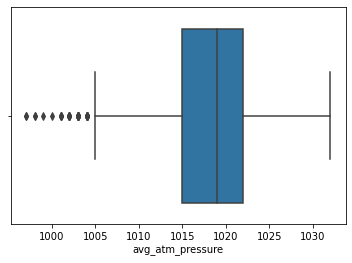

In [56]:
sns.boxplot(x=dtrain['avg_atm_pressure'])

In [57]:
from scipy import stats


# Calculate the Z-scores of the feature
z = stats.zscore(dtrain['avg_atm_pressure'])
z
# Identify any outliers (Z-score greater than 3 or less than -3)
outliers = dtrain[(z > 3) | (z < -3)]
outliers
# Handle the outlier rows
if len(outliers) > 0:
    dtrain.loc[outliers.index, 'avg_atm_pressure'] = dtrain['avg_atm_pressure'].mean()

### Dispersão estatísitica

/home/virdze/anaconda3/envs/env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/virdze/anaconda3/envs/env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/virdze/anaconda3/envs/env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

<AxesSubplot:xlabel='avg_wind_speed', ylabel='Density'>

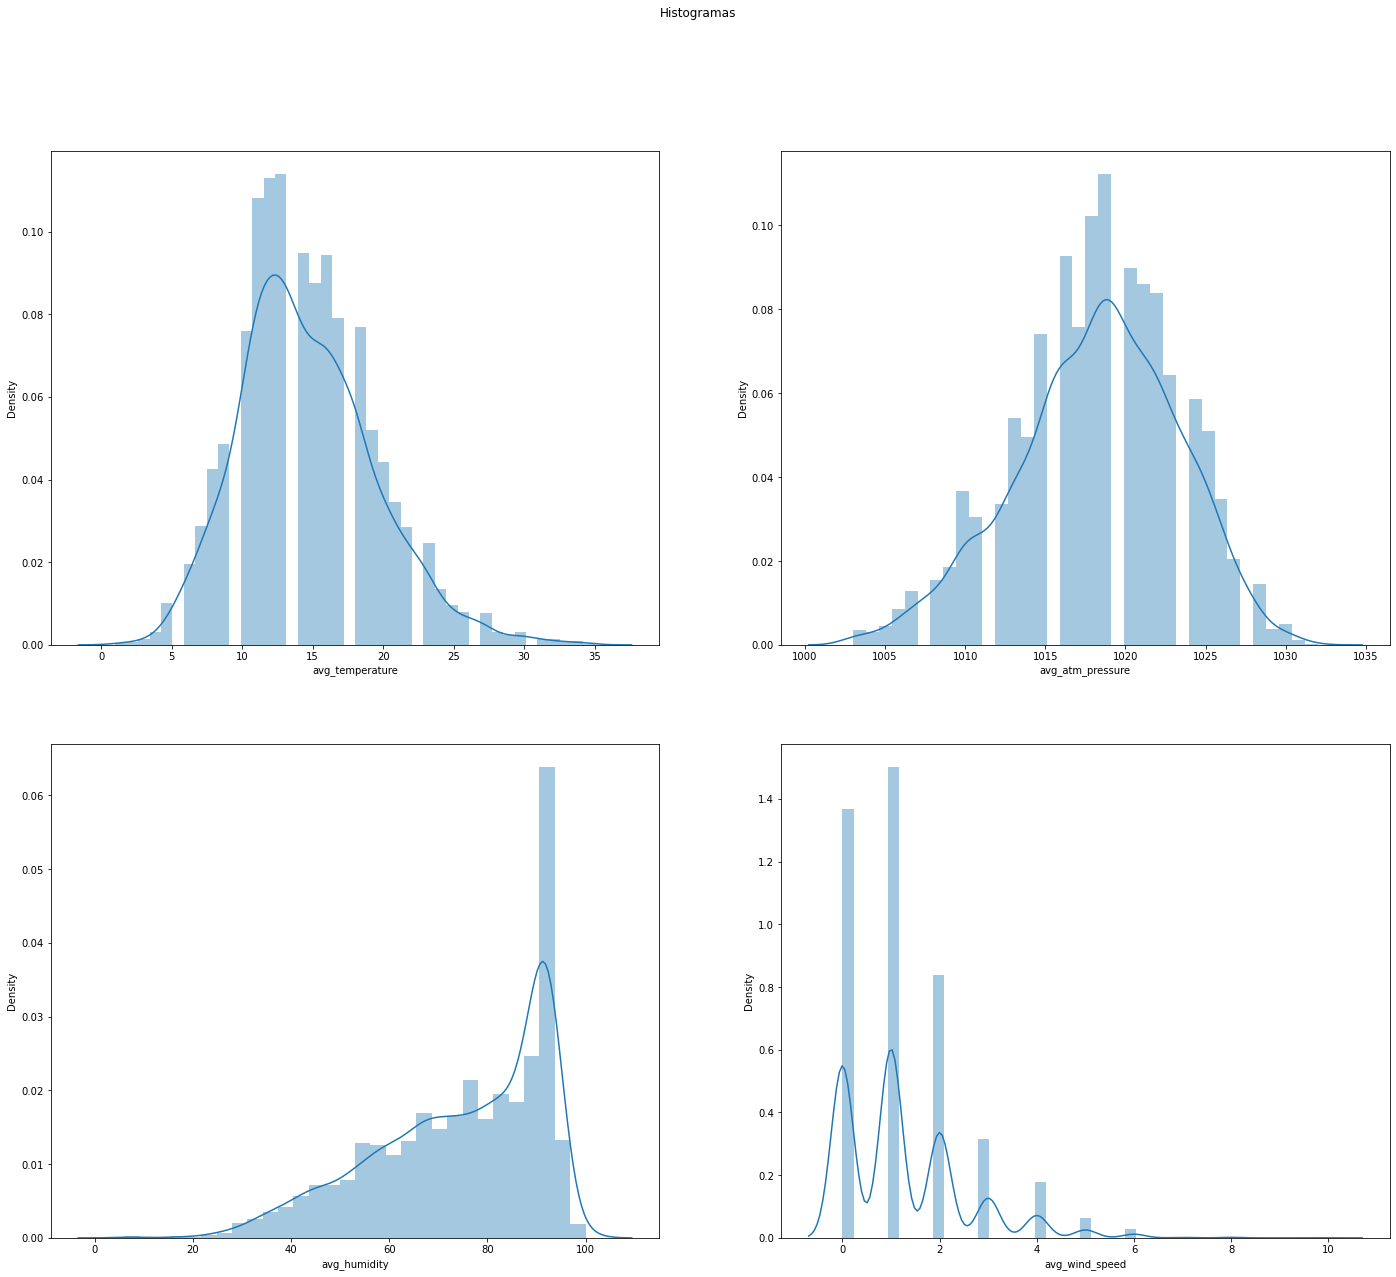

In [58]:
'''Dispersão estatística'''
fig, axs = plt.subplots(2,2,figsize=(24,20))
fig.suptitle('Histogramas')
sns.distplot(dtrain['avg_temperature'],ax = axs[0,0], kde=True)   
sns.distplot(dtrain['avg_atm_pressure'],ax = axs[0,1], kde=True)
sns.distplot(dtrain['avg_humidity'],ax=axs[1,0],kde=True)
sns.distplot(dtrain['avg_wind_speed'],ax=axs[1,1],kde=True)

### Correlation Matrix


<AxesSubplot:>

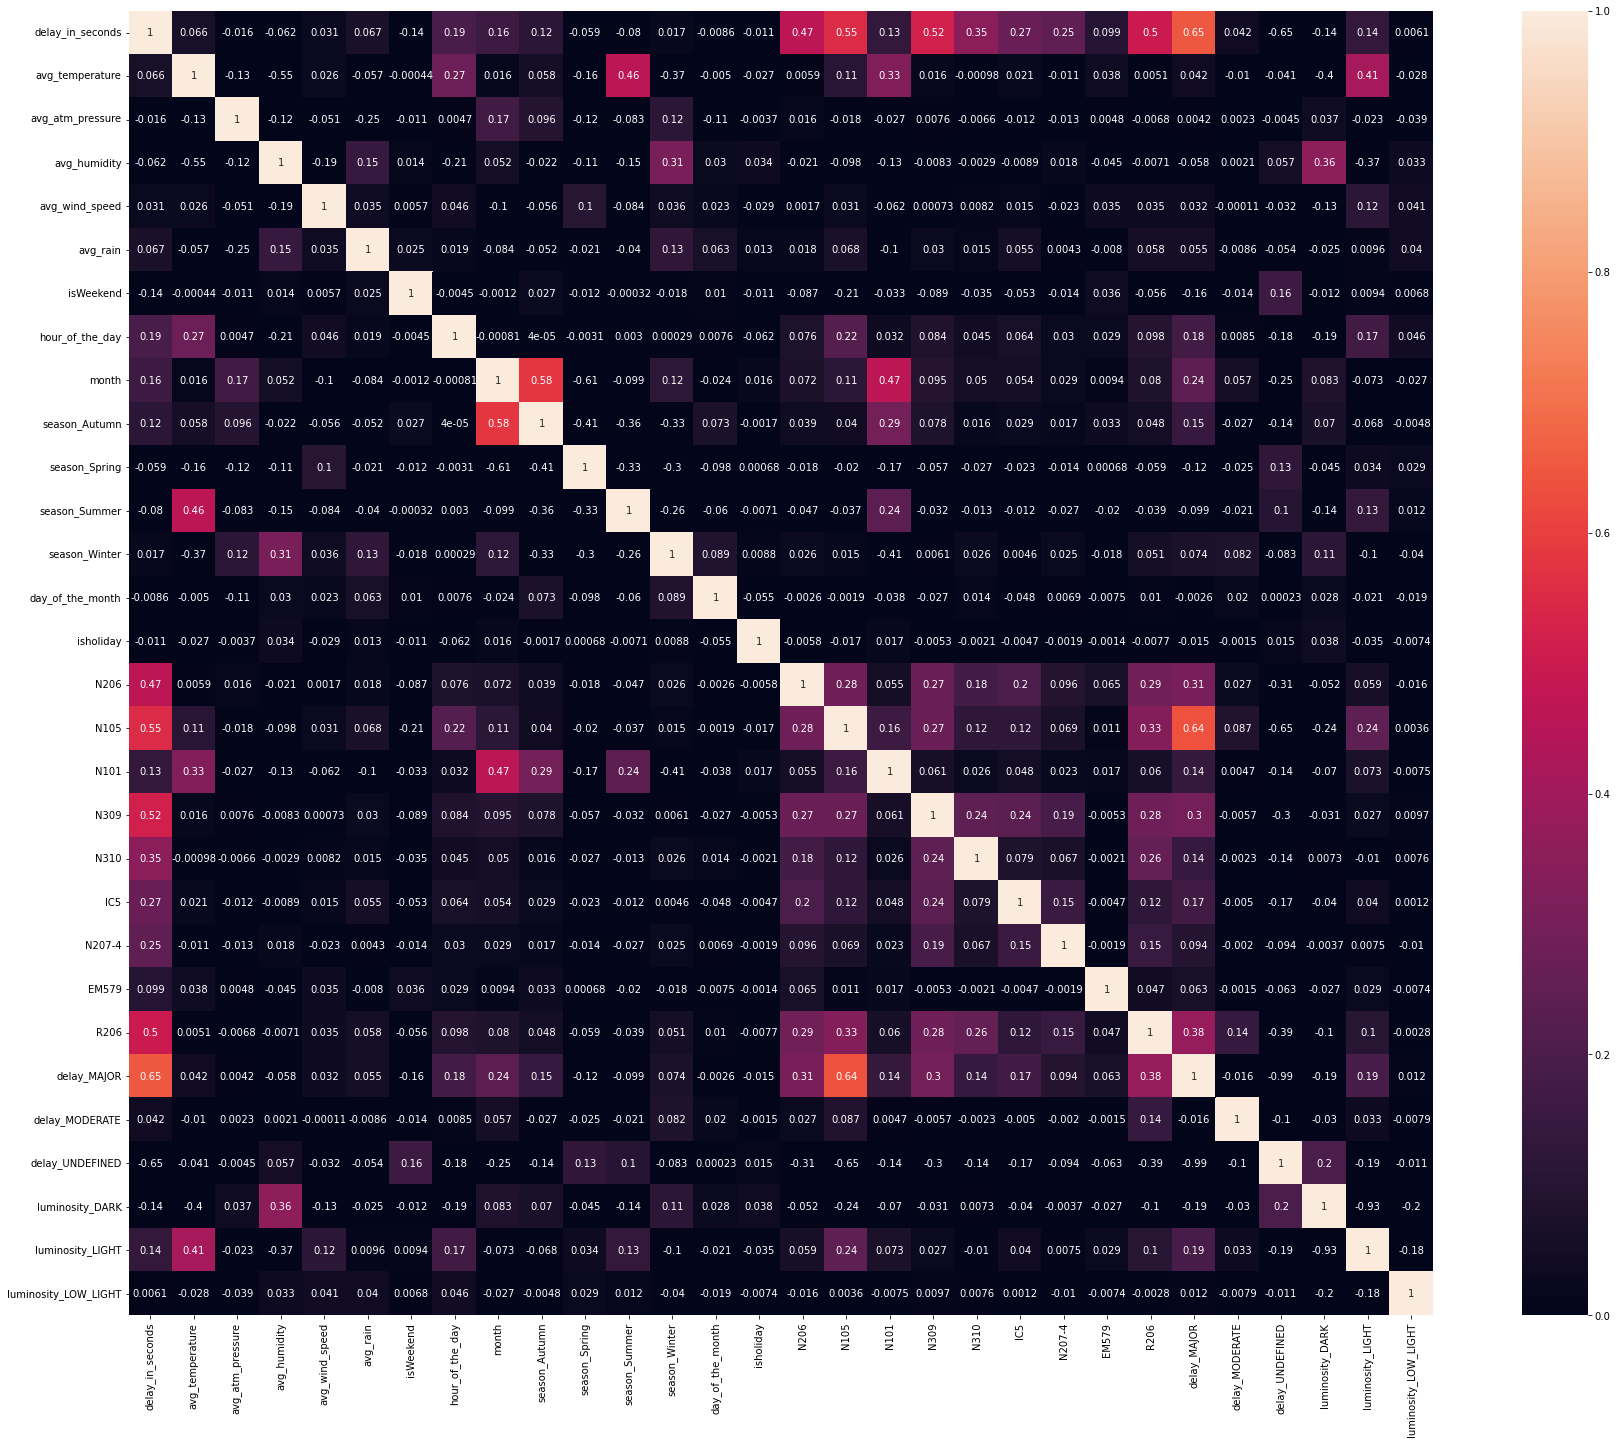

In [59]:
#Correlation
corr = dtrain.corr()
f, ax = plt.subplots(figsize=(32,24))
sns.heatmap(corr,vmin=0,vmax=1,square=True,annot=True)

### Plots

### Metrics

In [60]:
dtrain.var()

delay_in_seconds        2.845495e+06
avg_temperature         2.323736e+01
avg_atm_pressure        2.557807e+01
avg_humidity            2.959996e+02
avg_wind_speed          1.612510e+00
avg_rain                6.674419e-02
isWeekend               2.017283e-01
hour_of_the_day         4.775369e+01
month                   1.184825e+01
season_Autumn           2.127936e-01
season_Spring           2.005784e-01
season_Summer           1.728617e-01
season_Winter           1.559049e-01
day_of_the_month        7.629560e+01
isholiday               1.398320e-03
N206                    2.266629e-02
N105                    1.449233e-01
N101                    1.402021e-01
N309                    1.960392e-02
N310                    3.190398e-03
IC5                     1.516587e-02
N207-4                  2.593759e-03
EM579                   1.398320e-03
R206                    3.877560e-02
delay_MAJOR             1.172361e-01
delay_MODERATE          1.597760e-03
delay_UNDEFINED         1.183998e-01
l

### Normalization

In [61]:
from sklearn.preprocessing import MinMaxScaler

#Training Dataset 

columns = ['delay_in_seconds']

scaler = MinMaxScaler()
scaler.fit(dtrain[columns])

dtrain[columns] = scaler.transform(dtrain[columns])
dtrain


,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,isWeekend,hour_of_the_day,rush_hour,...,IC5,N207-4,EM579,R206,delay_MAJOR,delay_MODERATE,delay_UNDEFINED,luminosity_DARK,luminosity_LIGHT,luminosity_LOW_LIGHT
0,0.000000,12.0,1013.0,70.0,1.0,0,None,0,23,1,...,0,0,0,0,0,0,1,1,0,0
1,0.012386,12.0,1007.0,91.0,1.0,0,None,1,18,0,...,0,0,0,0,0,0,1,1,0,0
2,0.002220,14.0,1025.0,64.0,0.0,0,Low,0,15,1,...,0,0,0,0,0,0,1,0,1,0
3,0.073899,15.0,1028.0,75.0,1.0,0,Very_High,0,9,1,...,0,0,0,1,1,0,0,0,1,0
4,0.000000,27.0,1020.0,52.0,1.0,0,High,1,11,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.000000,13.0,1021.0,56.0,0.0,0,High,0,0,1,...,0,0,0,0,0,0,1,1,0,0
4996,0.000000,19.0,1017.0,68.0,0.0,0,None,0,14,1,...,0,0,0,0,0,0,1,0,1,0
4997,0.000000,13.0,1023.0,47.0,2.0,0,None,0,3,0,...,0,0,0,0,0,0,1,1,0,0
4998,0.000000,12.0,1014.0,93.0,2.0,0,None,0,6,0,...,0,0,0,0,0,0,1,1,0,0


In [62]:
#Test dataset

columns = ['delay_in_seconds']

scaler = MinMaxScaler()
scaler.fit(dtest[columns])

dtest[columns] = scaler.transform(dtest[columns])
dtest

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,isWeekend,hour_of_the_day,rush_hour,month,...,IC5,N207-4,EM579,R206,delay_MAJOR,delay_MODERATE,delay_UNDEFINED,luminosity_DARK,luminosity_LIGHT,luminosity_LOW_LIGHT
0,0.081461,15.0,1018.0,80.0,0.0,0,0,19,0,4,...,0,0,0,0,0,0,1,0,1,0
1,0.000000,16.0,1018.0,41.0,2.0,0,0,4,0,10,...,0,0,0,0,0,0,1,1,0,0
2,0.000000,22.0,1017.0,71.0,0.0,0,1,19,0,7,...,0,0,0,0,0,0,1,0,1,0
3,0.009417,18.0,1008.0,81.0,3.0,0,1,15,1,10,...,0,0,0,1,0,0,1,0,1,0
4,0.000000,20.0,1022.0,86.0,0.0,0,0,10,0,10,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,0.000000,12.0,1025.0,70.0,2.0,0,0,10,0,12,...,0,0,0,0,0,0,1,0,1,0
1202,0.002960,24.0,1016.0,39.0,2.0,0,0,0,1,7,...,0,0,0,0,0,0,1,1,0,0
1203,0.084824,13.0,1018.0,60.0,0.0,0,1,15,1,12,...,0,0,0,0,1,0,0,0,1,0
1204,0.016548,15.0,1015.0,50.0,1.0,0,0,17,0,3,...,0,0,0,0,0,0,1,0,1,0


## Decision Tree Model

In [63]:
'''Decision Trees'''

data = dtrain.drop(['incidents'],axis=1)
target = dtrain['incidents'].to_frame()

In [64]:
clf = tree.DecisionTreeClassifier(random_state=2021)
clf.fit(data,target)

#predictions = clf.predict(dtest)
#prediction = pd.DataFrame(predictions, columns=['predictions'])
#prediction.rename(columns={"predictions":"Incidents"},inplace=True)

#prediction.index = prediction.index+1

DecisionTreeClassifier(random_state=2021)

In [65]:
# prediction.to_csv('demosubmission.csv')

## Random Forest Model

In [66]:
dtrain.columns

Index(['delay_in_seconds', 'avg_temperature', 'avg_atm_pressure',
       'avg_humidity', 'avg_wind_speed', 'avg_rain', 'incidents', 'isWeekend',
       'hour_of_the_day', 'rush_hour', 'month', 'season_Autumn',
       'season_Spring', 'season_Summer', 'season_Winter', 'day_of_the_month',
       'isholiday', 'N206', 'N105', 'N101', 'N309', 'N310', 'IC5', 'N207-4',
       'EM579', 'R206', 'delay_MAJOR', 'delay_MODERATE', 'delay_UNDEFINED',
       'luminosity_DARK', 'luminosity_LIGHT', 'luminosity_LOW_LIGHT'],
      dtype='object')

In [67]:
from sklearn.ensemble import RandomForestClassifier

data_training = dtrain.drop(['incidents'],axis=1)
target_training = dtrain['incidents'].to_frame()


rfc = RandomForestClassifier(random_state=2021,n_estimators=25,min_samples_split=5, max_features=None ,max_depth=20,criterion='entropy',bootstrap=True)
rfc.fit(data_training,target_training)

/home/virdze/anaconda3/envs/env/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(criterion='entropy', max_depth=20, max_features=None,
                       min_samples_split=5, n_estimators=25, random_state=2021)

In [68]:
print(data_training.columns)
print(rfc.feature_importances_)

Index(['delay_in_seconds', 'avg_temperature', 'avg_atm_pressure',
       'avg_humidity', 'avg_wind_speed', 'avg_rain', 'isWeekend',
       'hour_of_the_day', 'rush_hour', 'month', 'season_Autumn',
       'season_Spring', 'season_Summer', 'season_Winter', 'day_of_the_month',
       'isholiday', 'N206', 'N105', 'N101', 'N309', 'N310', 'IC5', 'N207-4',
       'EM579', 'R206', 'delay_MAJOR', 'delay_MODERATE', 'delay_UNDEFINED',
       'luminosity_DARK', 'luminosity_LIGHT', 'luminosity_LOW_LIGHT'],
      dtype='object')
[3.17797830e-01 1.71517907e-02 3.68198485e-02 2.06365264e-02
 6.66047709e-03 1.29813922e-03 5.69788355e-03 1.63806618e-02
 1.23238812e-03 2.63140298e-01 3.93331388e-03 8.48779159e-03
 9.02824605e-03 8.55703148e-03 1.44504308e-01 0.00000000e+00
 3.48769304e-04 2.89669192e-03 1.19050553e-01 6.29745161e-04
 0.00000000e+00 3.63763664e-04 1.36277655e-04 1.53598667e-05
 9.06144996e-04 6.15173565e-03 1.40526518e-04 4.82115042e-03
 1.40188738e-03 1.22450451e-03 5.86354964e-04]


In [69]:
predictions = rfc.predict(dtest)
#prediction = pd.DataFrame(predictions, columns=['predictions'])
#prediction.rename(columns={"predictions":"Incidents"},inplace=True)
#prediction.index = prediction.index+1
#prediction

In [70]:
#prediction.to_csv('randomForest_14.csv')

So that we can check if the model is overffiting, we can locally calcutate de accuracy of the model itself and see how much difference in terms of accuracy there is when comparing to the result obtained in the Kaggle Platform.

In [71]:

data_train, data_test, target_train, target_test = train_test_split(data_training, target_training, test_size=0.2412, random_state=2021)

rfc_local = RandomForestClassifier(random_state=2021,n_estimators=25,min_samples_split=5, max_features=None ,max_depth=20,criterion='entropy',bootstrap=True)
rfc_local.fit(data_train,target_train.values.ravel())

predictions_local = rfc_local.predict(data_test)
print(accuracy_score(predictions_local, target_test))


0.9320066334991708


Given that the result obtained in the Kaggle platform, we can say that the model is not overfitting.

In [72]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=rfc_local, step=1, cv=10, scoring='accuracy')
rfecv = rfecv.fit(data_train,target_train)

/home/virdze/anaconda3/envs/env/lib/python3.6/site-packages/sklearn/feature_selection/_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
/home/virdze/anaconda3/envs/env/lib/python3.6/site-packages/sklearn/feature_selection/_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
/home/virdze/anaconda3/envs/env/lib/python3.6/site-packages/sklearn/feature_selection/_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
/home/virdze/anaconda3/envs/env/lib/python3.6/site-packages/sklearn/feature_selection/_rfe.py:241: DataConversionWarning: A column-ve

In [73]:
print(rfecv.n_features_)
print(rfecv.support_)

5
[ True False  True False False False False False False  True False False
 False False  True False False False  True False False False False False
 False False False False False False False]


In [74]:
dtrain.columns

Index(['delay_in_seconds', 'avg_temperature', 'avg_atm_pressure',
       'avg_humidity', 'avg_wind_speed', 'avg_rain', 'incidents', 'isWeekend',
       'hour_of_the_day', 'rush_hour', 'month', 'season_Autumn',
       'season_Spring', 'season_Summer', 'season_Winter', 'day_of_the_month',
       'isholiday', 'N206', 'N105', 'N101', 'N309', 'N310', 'IC5', 'N207-4',
       'EM579', 'R206', 'delay_MAJOR', 'delay_MODERATE', 'delay_UNDEFINED',
       'luminosity_DARK', 'luminosity_LIGHT', 'luminosity_LOW_LIGHT'],
      dtype='object')

In [75]:
p = rfecv.predict(data_test)
accuracy_score(p, target_test)

0.9245439469320066

In [76]:
#prediction = pd.DataFrame(p, columns=['predictions'])
#prediction.rename(columns={"predictions":"Incidents"},inplace=True)
#prediction.index = prediction.index+1
#prediction.to_csv("randomForest_3.csv")

In [77]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion' : ['gini', 'entropy'],
    'n_estimators' : [10,50,100,200],
    'max_depth' : [2,4,6,8,10],
    'max_features' : ['auto',None],
    'min_samples_split' : [2,5,10,20],
    'min_samples_leaf' : [2,5,10,20]
}

grid_search_rfc = RandomForestClassifier(random_state=2021)

gs = GridSearchCV(estimator=grid_search_rfc, param_grid=param_grid,cv=5,scoring='accuracy')

gs.fit(data_train,target_train)



/home/virdze/anaconda3/envs/env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/virdze/anaconda3/envs/env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/virdze/anaconda3/envs/env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/virdze/anaconda3/envs/env/lib/python3.6/site-packages/sklearn/model_selec

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2021),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['auto', None],
                         'min_samples_leaf': [2, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [78]:
grid_pred = gs.predict(data_test)

gs.best_estimator_
#gs.best_params_

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=None,
                       min_samples_leaf=2, random_state=2021)

In [79]:
x = RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=5,n_estimators=100,random_state=2021,criterion='entropy')
x.fit(data_train,target_train)

preds = x.predict(data_test)
accuracy_score(preds,target_test)

/home/virdze/anaconda3/envs/env/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9253731343283582